# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

In [2]:
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv"


### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv(url, sep='\t')


### Step 4. See the first 10 entries

In [4]:
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 5. Create a histogram of the top 5 items bought

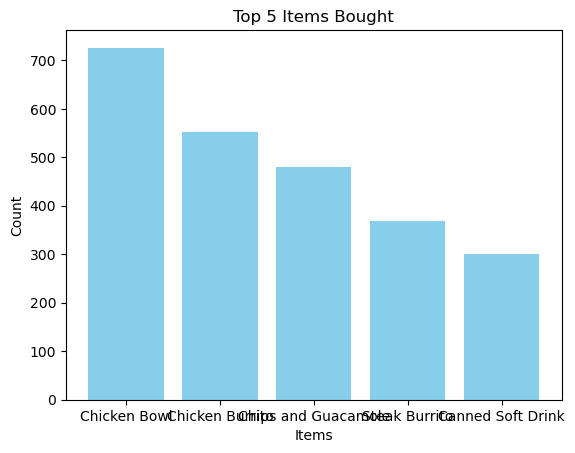

In [5]:
item_counts = Counter(chipo['item_name'])
top_5_items = item_counts.most_common(5)
items, counts = zip(*top_5_items)

plt.bar(items, counts, color='skyblue')
plt.title('Top 5 Items Bought')
plt.xlabel('Items')
plt.ylabel('Count')
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

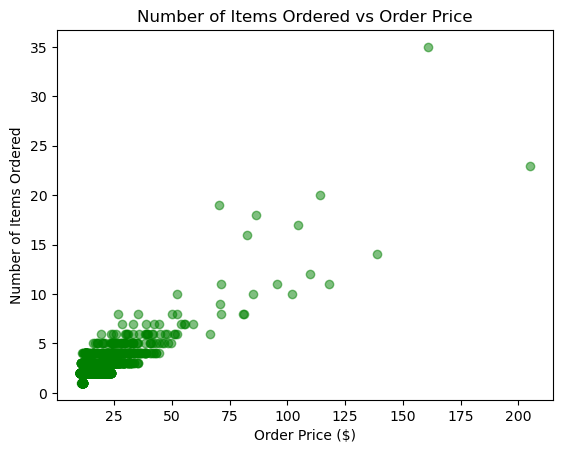

In [6]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# Group by order_id to calculate total price and total quantity per order
order_data = chipo.groupby('order_id').agg({'item_price': 'sum', 'quantity': 'sum'})

plt.scatter(order_data['item_price'], order_data['quantity'], alpha=0.5, color='green')
plt.title('Number of Items Ordered vs Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.

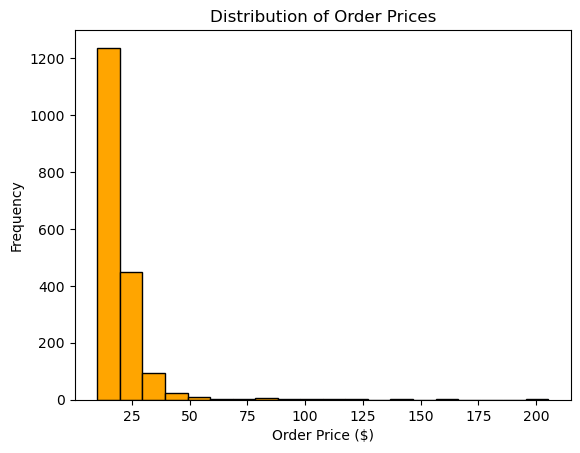

In [7]:
plt.hist(order_data['item_price'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Order Prices')
plt.xlabel('Order Price ($)')
plt.ylabel('Frequency')
plt.show()